In [14]:
# Assignment: DSC630 Week1
# Name: Bezawada, Sashidhar
# Date: 2023-06-10
# 1.2 Assignment: R/Python Refresher

## 1. Write a summary of your data and identify at least two questions to explore visually with your data.

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.


The COVID-19 pandemic has posed a significant global challenge, with vaccination programs being key to mitigating its impact. Monitoring and analyzing vaccination progress is crucial for understanding the effectiveness of immunization efforts across countries and continents. In order to provide valuable insights into the global vaccination landscape, a Tableau dashboard was developed utilizing the Our World in Data COVID vaccination dataset. This dataset contains up-to-date, official records from governments and health ministries worldwide.

Two questions which needs to answered are:

1. Which country was badly hit by the pandemic?
2. Which country has done better with vaccinations?

In [15]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Import the data frame and ensure that the data is loaded properly

In [16]:
#Load the dataset as a Pandas data frame
df_country = pd.read_csv('datasets/covid_worldwide.csv')
#Display the first ten rows of data
df_country.head(10)

Serial Number   Country  Total Cases Total Deaths Total Recovered  \
0              1       USA  104,196,861    1,132,935     101,322,779   
1              2     India   44,682,784      530,740      44,150,289   
2              3    France   39,524,311      164,233      39,264,546   
3              4   Germany   37,779,833      165,711      37,398,100   
4              5    Brazil   36,824,580      697,074      35,919,372   
5              6     Japan   32,588,442       68,399      21,567,425   
6              7  S. Korea   30,197,066       33,486      29,740,877   
7              8     Italy   25,453,789      186,833      25,014,986   
8              9        UK   24,274,361      204,171      24,020,088   
9             10    Russia   21,958,696      395,108      21,356,008   

  Active Cases     Total Test     Population  
0    1,741,147  1,159,832,679    334,805,269  
1        1,755    915,265,788  1,406,631,776  
2       95,532    271,490,188     65,584,518  
3      216,022    122,332,384     83,883,596  
4      208,134     63,776,166    215,353,593  
5   10,952,618     92,144,639    125,584,838  
6      422,703     15,804,065     51,329,899  
7      251,970    265,478,247     60,262,770  
8       50,102    522,526,476     68,497,907  
9      207,580    273,400,000    145,805,947

In [17]:
df_country.dtypes

Serial Number       int64
Country            object
Total Cases        object
Total Deaths       object
Total Recovered    object
Active Cases       object
Total Test         object
Population         object
dtype: object

In [52]:
df_country['Total Cases']=df_country['Total Cases'].str.replace(',','').astype(int)
df_country['Total Deaths']=df_country['Total Deaths'].str.replace(',','').astype(int)
df_country['Total Recovered']=df_country['Total Recovered'].str.replace(',','').astype(int)
df_country['Active Cases']=df_country['Active Cases'].str.replace(',','').astype(int)
df_country['Total Test']=df_country['Total Test'].str.replace(',','').astype(int)
df_country['Population']=df_country['Population'].str.replace(',','').astype(int)

In [53]:
df_country.dtypes

Serial Number       int64
Country            object
Total Cases         int32
Total Deaths        int32
Total Recovered     int32
Active Cases        int32
Total Test          int32
Population          int32
dtype: object

In [54]:
#Read CSV file for covid vaccinations
df_vaccines = pd.read_csv("datasets/vaccinations.csv")
#Display the first ten rows of data
df_vaccines.head(10)

location iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   
5  Afghanistan      AFG  2021-02-27                 NaN                NaN   
6  Afghanistan      AFG  2021-02-28              8200.0             8200.0   
7  Afghanistan      AFG  2021-03-01                 NaN                NaN   
8  Afghanistan      AFG  2021-03-02                 NaN                NaN   
9  Afghanistan      AFG  2021-03-03                 NaN                NaN   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                      NaN             NaN                     NaN   
1                      NaN             NaN                     NaN   
2                      NaN             NaN                     NaN   
3                      NaN             NaN                     NaN   
4                      NaN             NaN                     NaN   
5                      NaN             NaN                     NaN   
6                      NaN             NaN                     NaN   
7                      NaN             NaN                     NaN   
8                      NaN             NaN                     NaN   
9                      NaN             NaN                     NaN   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 NaN                            0.00   
1              1367.0                             NaN   
2              1367.0                             NaN   
3              1367.0                             NaN   
4              1367.0                             NaN   
5              1367.0                             NaN   
6              1367.0                            0.02   
7              1580.0                             NaN   
8              1794.0                             NaN   
9              2008.0                             NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                           0.00                                  NaN   
1                            NaN                                  NaN   
2                            NaN                                  NaN   
3                            NaN                                  NaN   
4                            NaN                                  NaN   
5                            NaN                                  NaN   
6                           0.02                                  NaN   
7                            NaN                                  NaN   
8                            NaN                                  NaN   
9                            NaN                                  NaN   

   total_boosters_per_hundred  daily_vaccinations_per_million  \
0                         NaN                             NaN   
1                         NaN                            33.0   
2                         NaN                            33.0   
3                         NaN                            33.0   
4                         NaN                            33.0   
5                         NaN                            33.0   
6                         NaN                            33.0   
7                         NaN                            38.0   
8                         NaN                            44.0   
9                         NaN                            49.0   

   daily_people_vaccinated  daily_people_vaccinated_per_hundred  
0                      NaN                                  NaN  
1                   1367.0                                0.003  
2                   1367.0    

In [55]:
#Fill NAN values with Zero
df_vaccines=df_vaccines.fillna(0)
df_vaccines.head(10)

location iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 0.0                0.0   
2  Afghanistan      AFG  2021-02-24                 0.0                0.0   
3  Afghanistan      AFG  2021-02-25                 0.0                0.0   
4  Afghanistan      AFG  2021-02-26                 0.0                0.0   
5  Afghanistan      AFG  2021-02-27                 0.0                0.0   
6  Afghanistan      AFG  2021-02-28              8200.0             8200.0   
7  Afghanistan      AFG  2021-03-01                 0.0                0.0   
8  Afghanistan      AFG  2021-03-02                 0.0                0.0   
9  Afghanistan      AFG  2021-03-03                 0.0                0.0   

   people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
0                      0.0             0.0                     0.0   
1                      0.0             0.0                     0.0   
2                      0.0             0.0                     0.0   
3                      0.0             0.0                     0.0   
4                      0.0             0.0                     0.0   
5                      0.0             0.0                     0.0   
6                      0.0             0.0                     0.0   
7                      0.0             0.0                     0.0   
8                      0.0             0.0                     0.0   
9                      0.0             0.0                     0.0   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                 0.0                            0.00   
1              1367.0                            0.00   
2              1367.0                            0.00   
3              1367.0                            0.00   
4              1367.0                            0.00   
5              1367.0                            0.00   
6              1367.0                            0.02   
7              1580.0                            0.00   
8              1794.0                            0.00   
9              2008.0                            0.00   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                           0.00                                  0.0   
1                           0.00                                  0.0   
2                           0.00                                  0.0   
3                           0.00                                  0.0   
4                           0.00                                  0.0   
5                           0.00                                  0.0   
6                           0.02                                  0.0   
7                           0.00                                  0.0   
8                           0.00                                  0.0   
9                           0.00                                  0.0   

   total_boosters_per_hundred  daily_vaccinations_per_million  \
0                         0.0                             0.0   
1                         0.0                            33.0   
2                         0.0                            33.0   
3                         0.0                            33.0   
4                         0.0                            33.0   
5                         0.0                            33.0   
6                         0.0                            33.0   
7                         0.0                            38.0   
8                         0.0                            44.0   
9                         0.0                            49.0   

   daily_people_vaccinated  daily_people_vaccinated_per_hundred  
0                      0.0                                0.000  
1                   1367.0                                0.003  
2                   1367.0    

In [56]:
df_vaccines.dtypes

location                                object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
total_boosters                         float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
total_boosters_per_hundred             float64
daily_vaccinations_per_million         float64
daily_people_vaccinated                float64
daily_people_vaccinated_per_hundred    float64
dtype: object

In [85]:
df_vaccine_sorted=df_vaccines.sort_values(['location','total_vaccinations'],ascending=[True,False])
df_vaccine_sorted.head()

location iso_code        date  total_vaccinations  people_vaccinated  \
834  Afghanistan      AFG  2023-06-06          19712836.0         16770724.0   
826  Afghanistan      AFG  2023-05-29          18434710.0         15875256.0   
818  Afghanistan      AFG  2023-05-21          17479379.0         15203606.0   
813  Afghanistan      AFG  2023-05-16          17116708.0         14949378.0   
811  Afghanistan      AFG  2023-05-14          17060992.0         14902276.0   

     people_fully_vaccinated  total_boosters  daily_vaccinations_raw  \
834               16064707.0       1893518.0                     0.0   
826               15168758.0       1511837.0                     0.0   
818               14502241.0       1223277.0                     0.0   
813               14233987.0       1128932.0                     0.0   
811               14187450.0       1120946.0                     0.0   

     daily_vaccinations  total_vaccinations_per_hundred  \
834            159766.0                           47.93   
826            119416.0                           44.82   
818             59770.0                           42.50   
813             22279.0                           41.62   
811             16329.0                           41.48   

     people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
834                          40.78                                39.06   
826                          38.60                                36.88   
818                          36.97                                35.26   
813                          36.35                                34.61   
811                          36.23                                34.50   

     total_boosters_per_hundred  daily_vaccinations_per_million  \
834                        4.60                          3885.0   
826                        3.68                          2903.0   
818                        2.97                          1453.0   
813                        2.74                           542.0   
811                        2.73                           397.0   

     daily_people_vaccinated  daily_people_vaccinated_per_hundred  
834                 111934.0                                0.272  
826                  83956.0                                0.204  
818                  43047.0                                0.105  
813                  18020.0                                0.044  
811                  12847.0                                0.031

In [86]:
df_vaccine_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171483 entries, 834 to 171481
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   location                             171483 non-null  object 
 1   iso_code                             171483 non-null  object 
 2   date                                 171483 non-null  object 
 3   total_vaccinations                   171483 non-null  float64
 4   people_vaccinated                    171483 non-null  float64
 5   people_fully_vaccinated              171483 non-null  float64
 6   total_boosters                       171483 non-null  float64
 7   daily_vaccinations_raw               171483 non-null  float64
 8   daily_vaccinations                   171483 non-null  float64
 9   total_vaccinations_per_hundred       171483 non-null  float64
 10  people_vaccinated_per_hundred        171483 non-null  float64
 11  people_full

In [87]:
#Sorting the dataframe
df_country_sorted=df_country.sort_values(['Total Cases','Total Recovered','Total Deaths'])

df_vaccine_sorted.drop_duplicates(subset='location',keep='first',inplace=True)
df_vaccine_sorted= df_vaccine_sorted.sort_values(['total_vaccinations'])


In [88]:
df_vaccine_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 123655 to 169404
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             235 non-null    object 
 1   iso_code                             235 non-null    object 
 2   date                                 235 non-null    object 
 3   total_vaccinations                   235 non-null    float64
 4   people_vaccinated                    235 non-null    float64
 5   people_fully_vaccinated              235 non-null    float64
 6   total_boosters                       235 non-null    float64
 7   daily_vaccinations_raw               235 non-null    float64
 8   daily_vaccinations                   235 non-null    float64
 9   total_vaccinations_per_hundred       235 non-null    float64
 10  people_vaccinated_per_hundred        235 non-null    float64
 11  people_fully_vaccinated_

In [89]:
df_country_sorted.head()

Serial Number           Country  Total Cases  Total Deaths  \
230            231           Tokelau            5             0   
229            230        MS Zaandam            9             2   
228            229    Western Sahara           10             1   
227            228      Vatican City           29             0   
226            227  Diamond Princess          712            13   

     Total Recovered  Active Cases  Total Test  Population  
230                0             5           0        1378  
229                7             0           0           0  
228                9             0           0      626161  
227               29             0           0         799  
226              699             0           0           0

## Create a histogram or bar graph from your data.

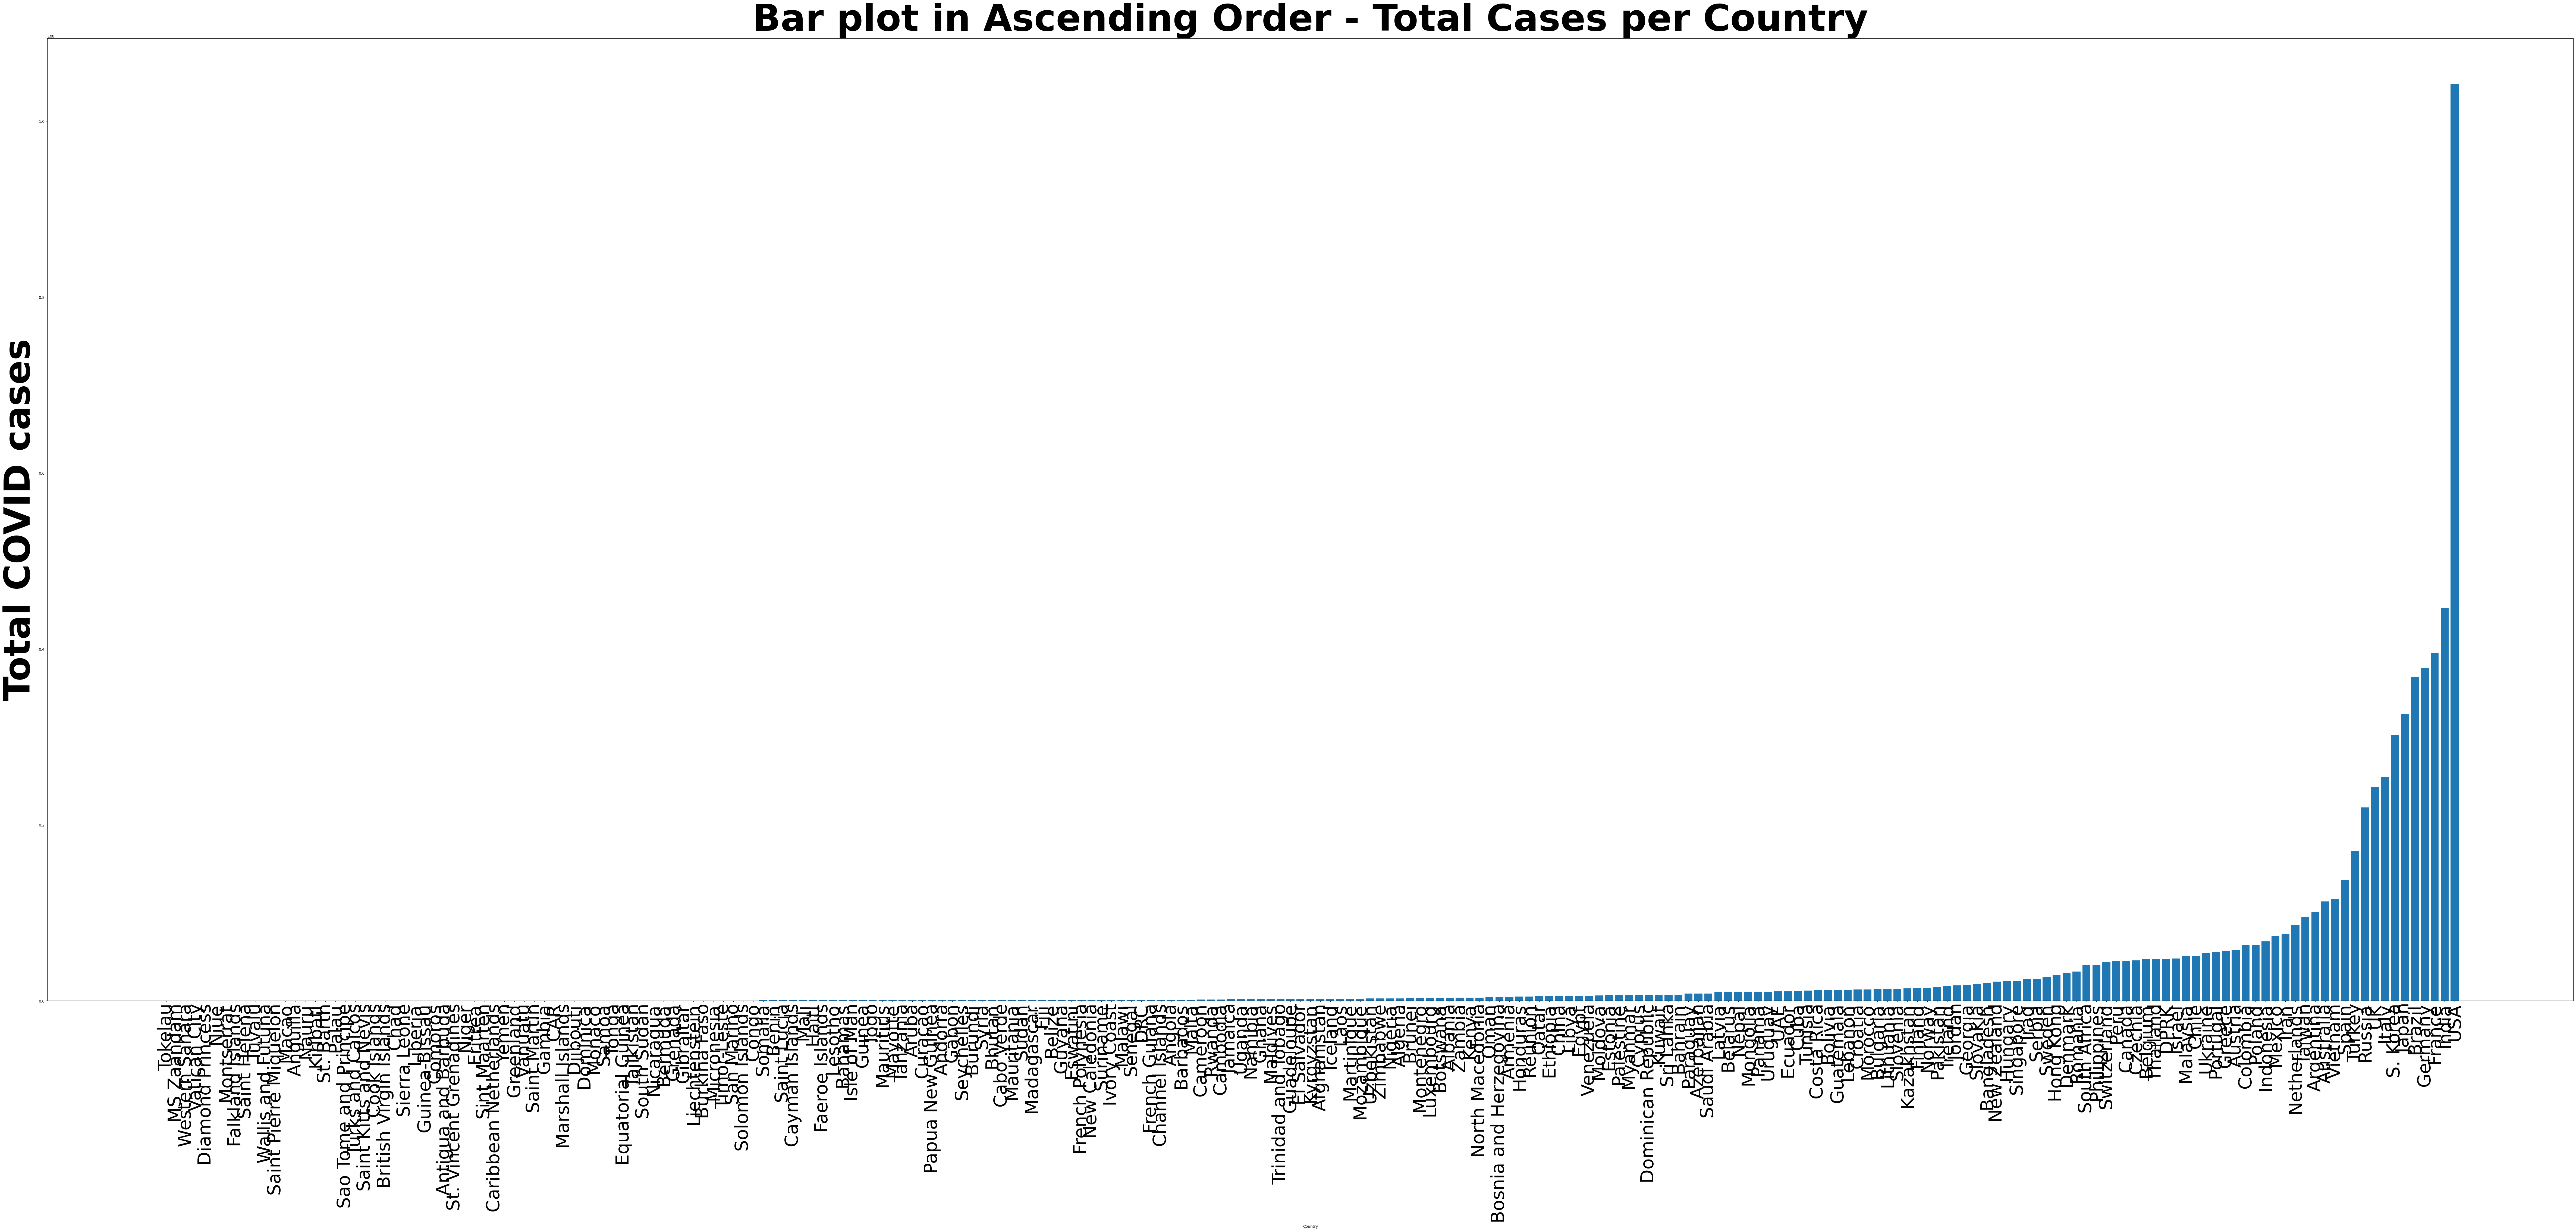

In [90]:
plt.figure(figsize=(120,46))
# bar plot with matplotlib
width = 0.8 # the width of the bars
plt.bar('Country', 'Total Cases',width,data=df_country_sorted)
plt.xlabel("Country")
plt.xticks(rotation=90, horizontalalignment="center", size=48)
plt.ylabel("Total COVID cases", size=95, weight='bold')
plt.title("Bar plot in Ascending Order - Total Cases per Country", size=98, weight='bold')
plt.show()

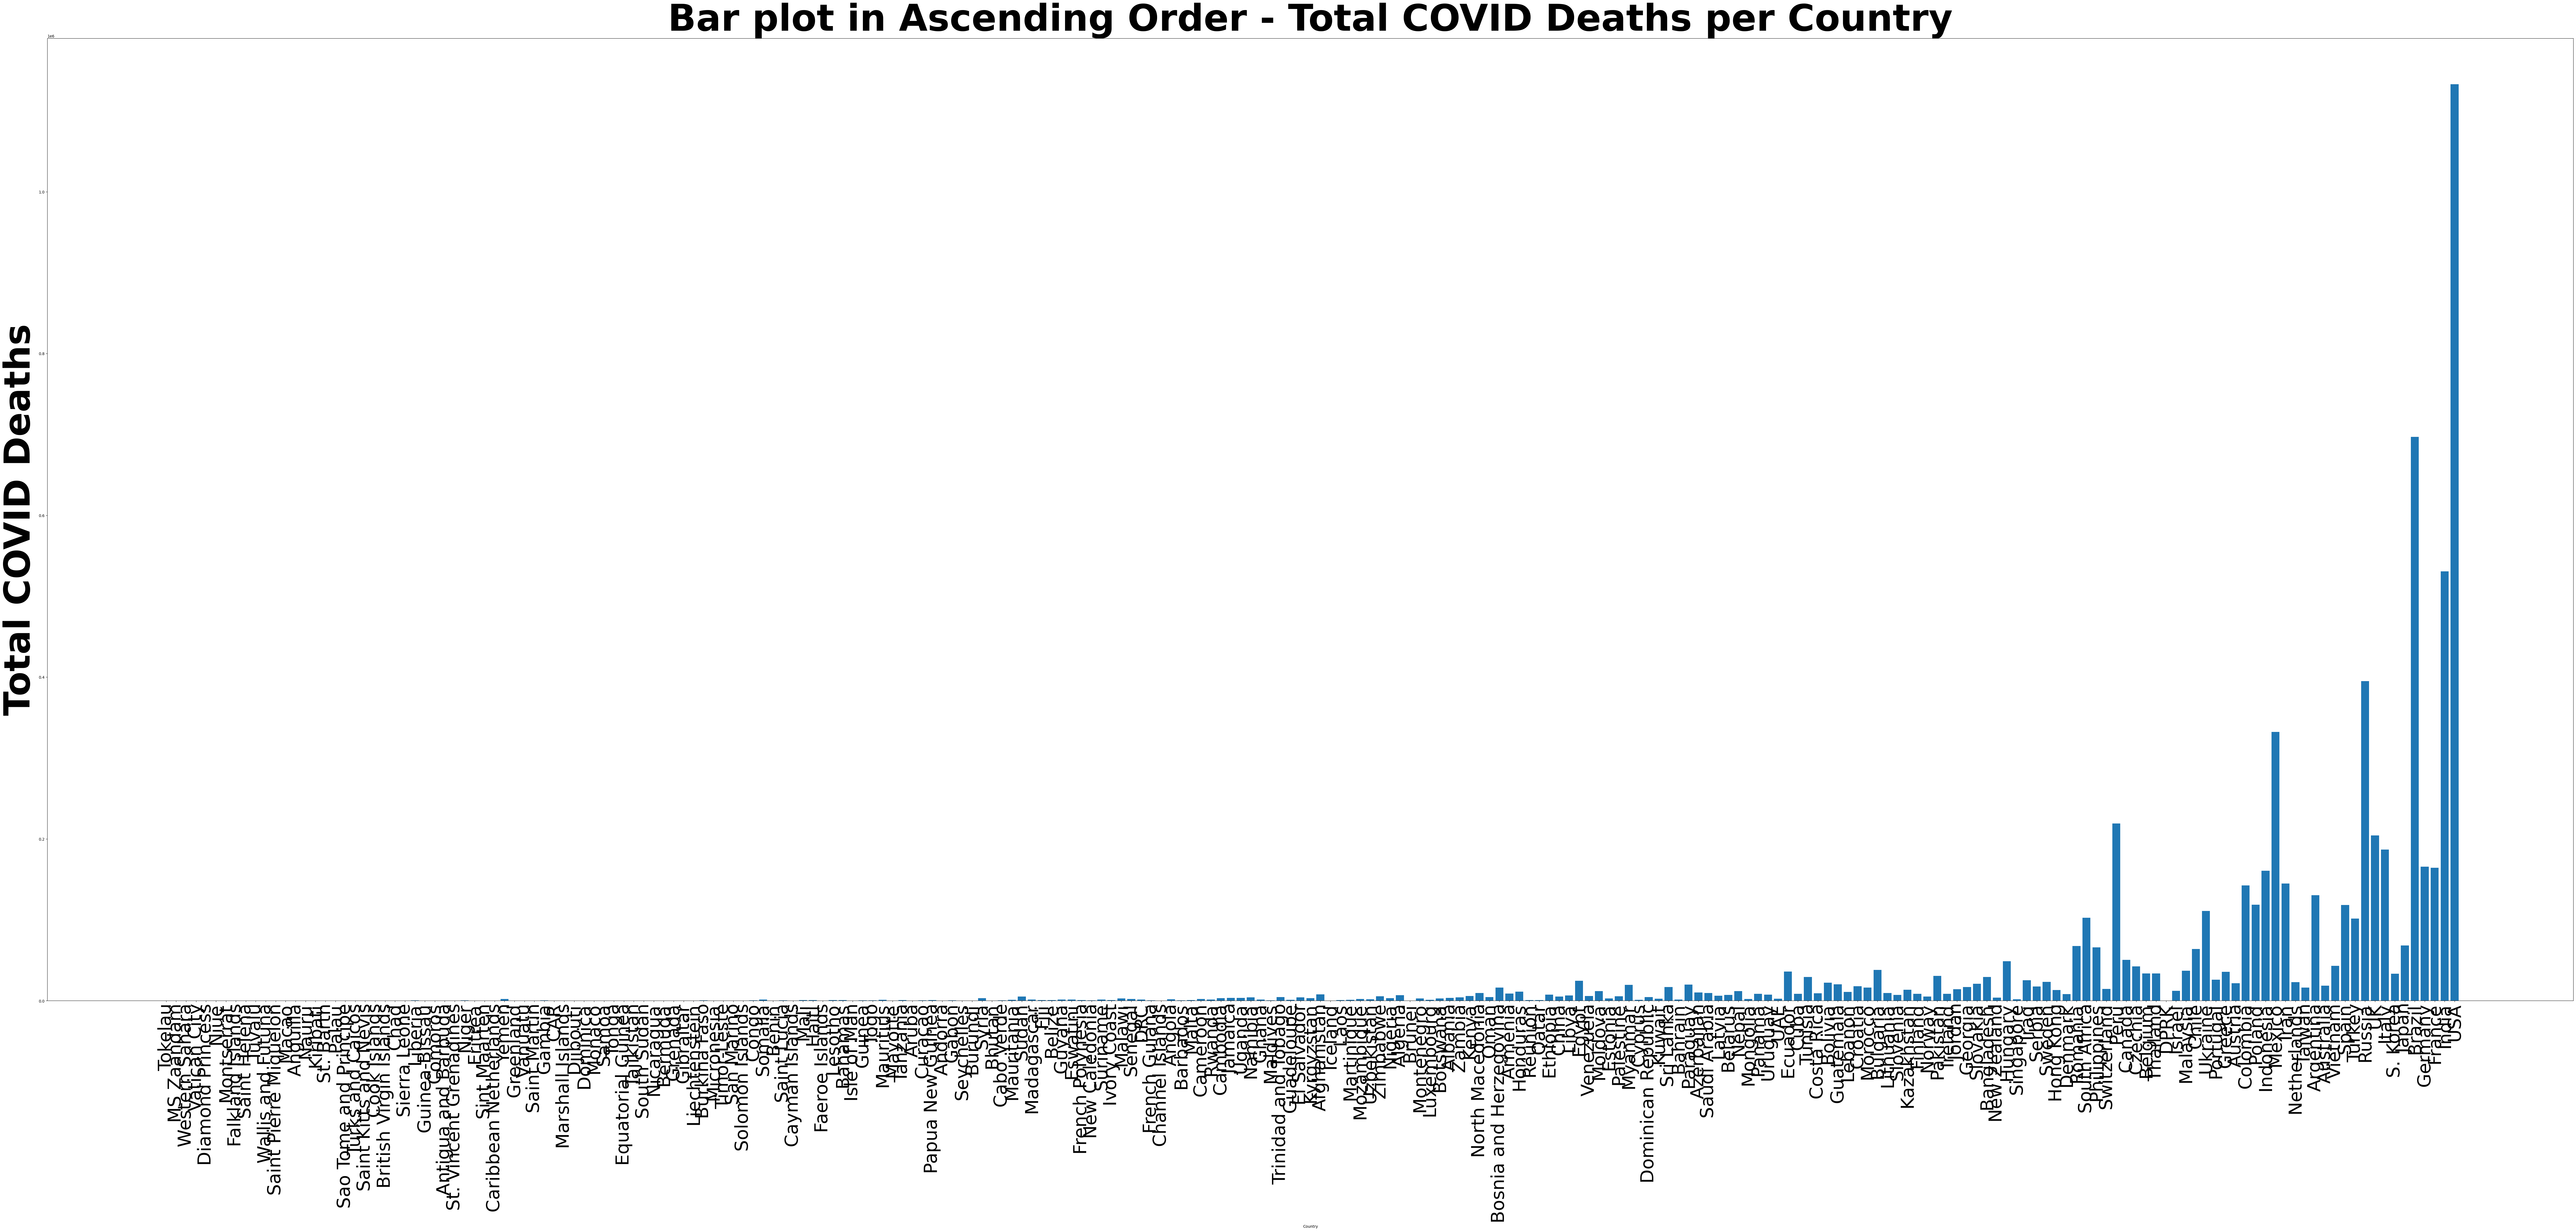

In [91]:
plt.figure(figsize=(120,46))
# bar plot with matplotlib
width = 0.8 # the width of the bars
plt.bar('Country', 'Total Deaths',width,data=df_country_sorted)
plt.xlabel("Country")
plt.xticks(rotation=90, horizontalalignment="center", size=48)
plt.ylabel("Total COVID Deaths", size=95, weight='bold')
plt.title("Bar plot in Ascending Order - Total COVID Deaths per Country", size=98, weight='bold')
plt.show()

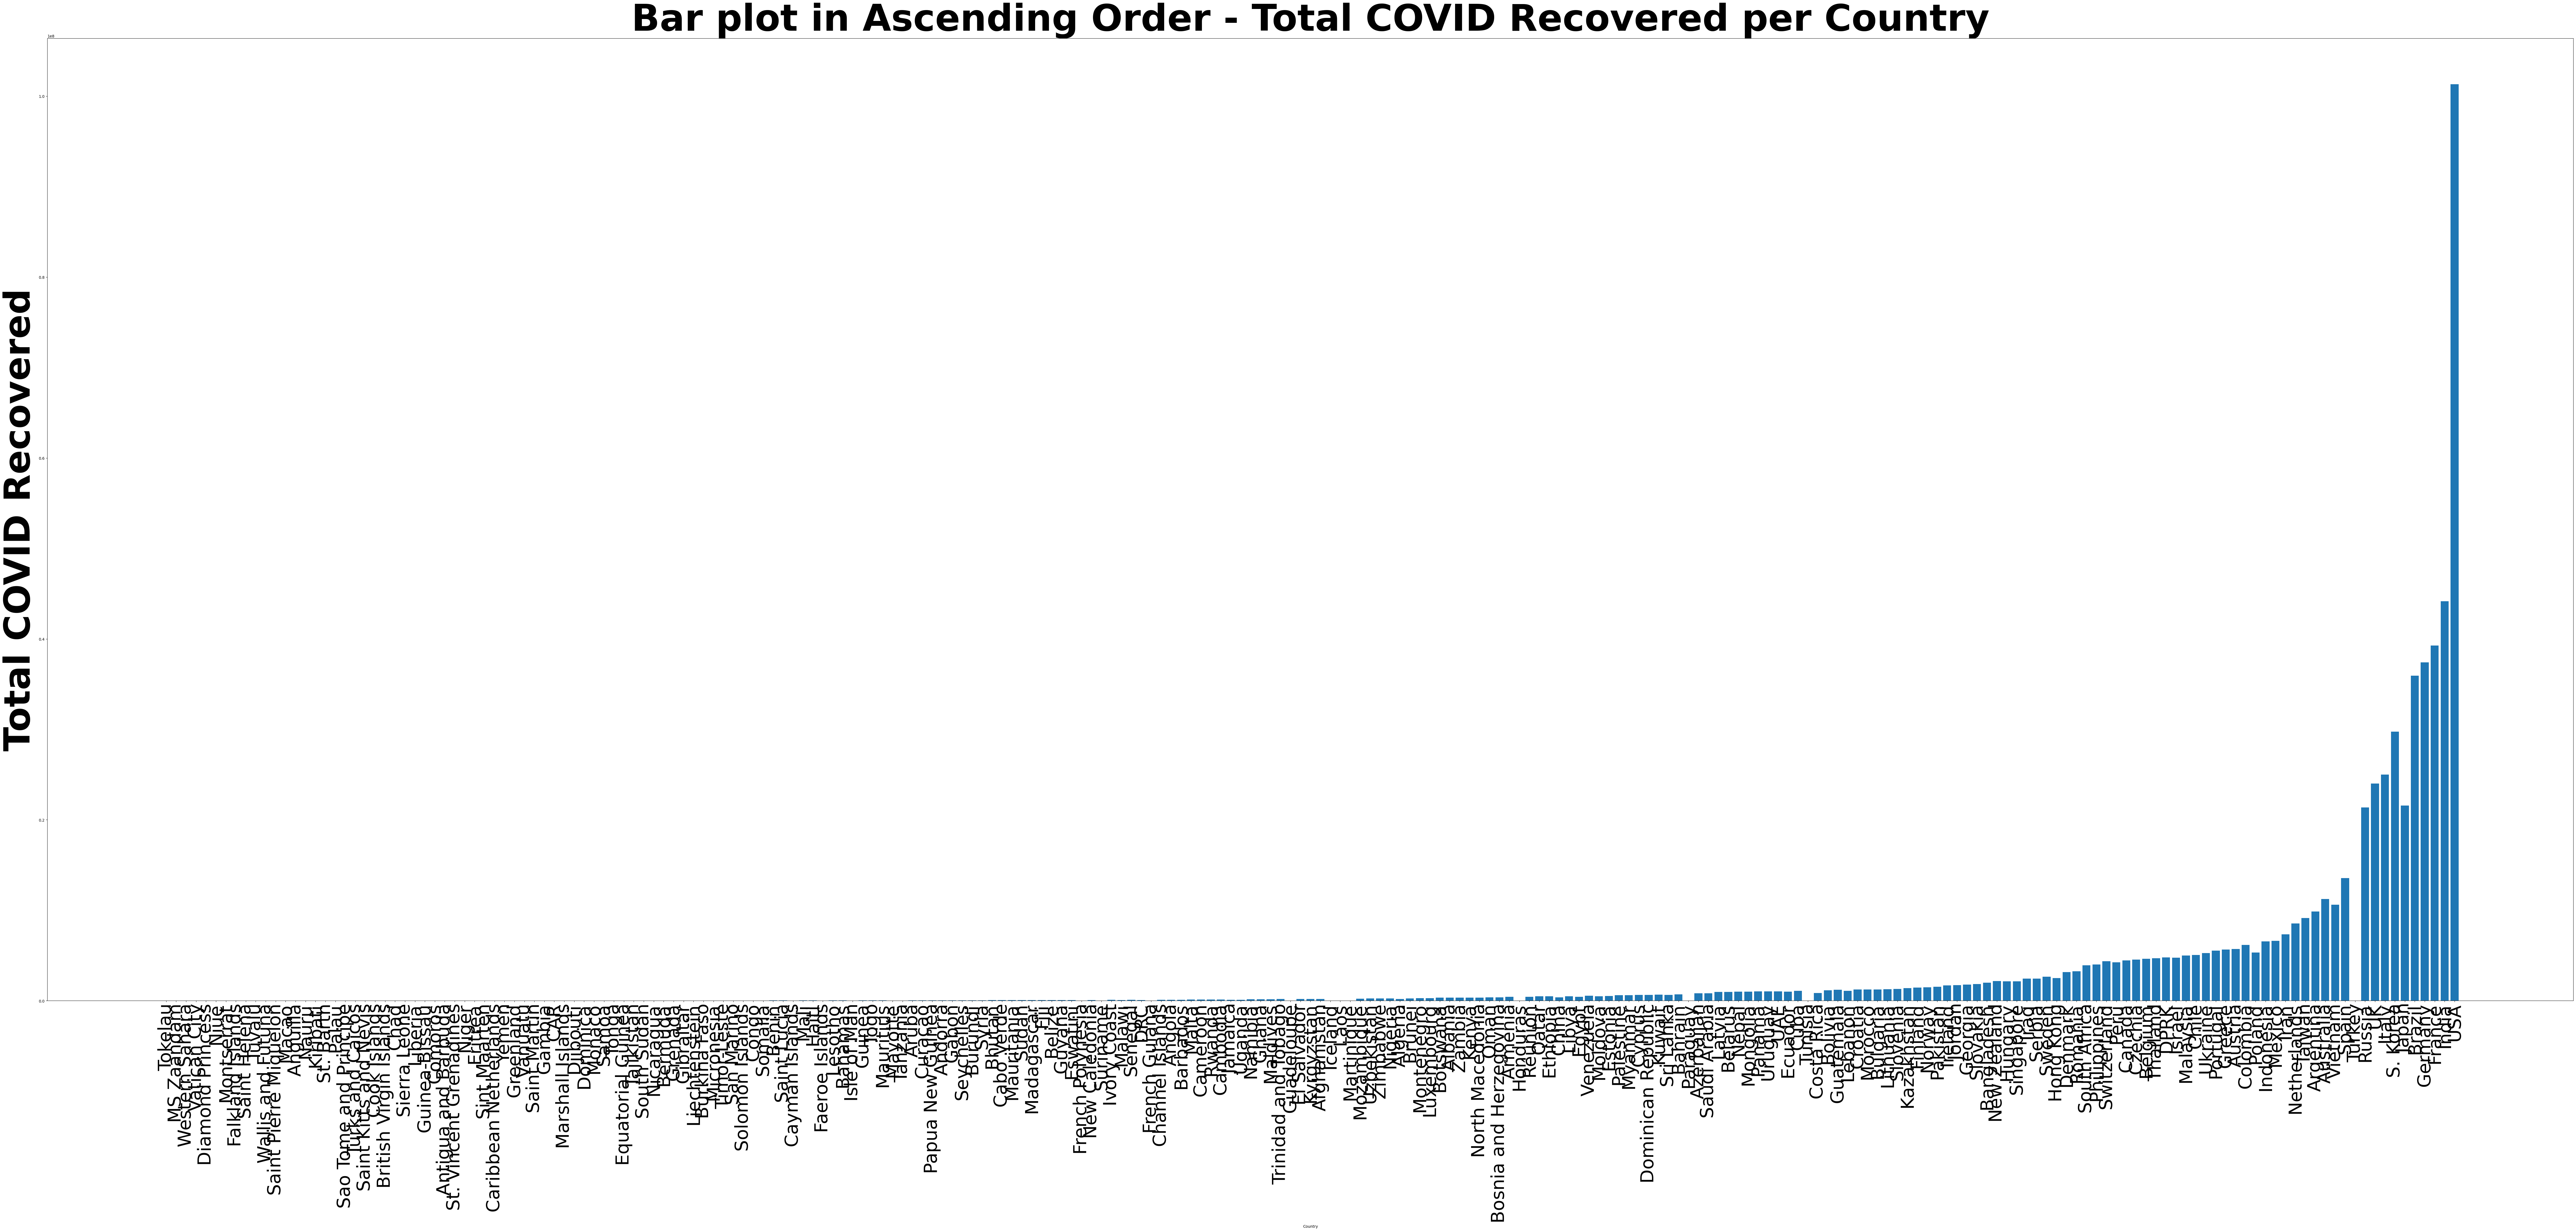

In [92]:
plt.figure(figsize=(120,46))
# bar plot with matplotlib
width = 0.8 # the width of the bars
plt.bar('Country', 'Total Recovered',width,data=df_country_sorted)
plt.xlabel("Country")
plt.xticks(rotation=90, horizontalalignment="center", size=48)
plt.ylabel("Total COVID Recovered", size=95, weight='bold')
plt.title("Bar plot in Ascending Order - Total COVID Recovered per Country", size=98, weight='bold')
plt.show()

In [93]:
## Create a boxplot from your data:

Total Cases           Axes(0.125,0.11;0.227941x0.77)
Total Deaths       Axes(0.398529,0.11;0.227941x0.77)
Total Recovered    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

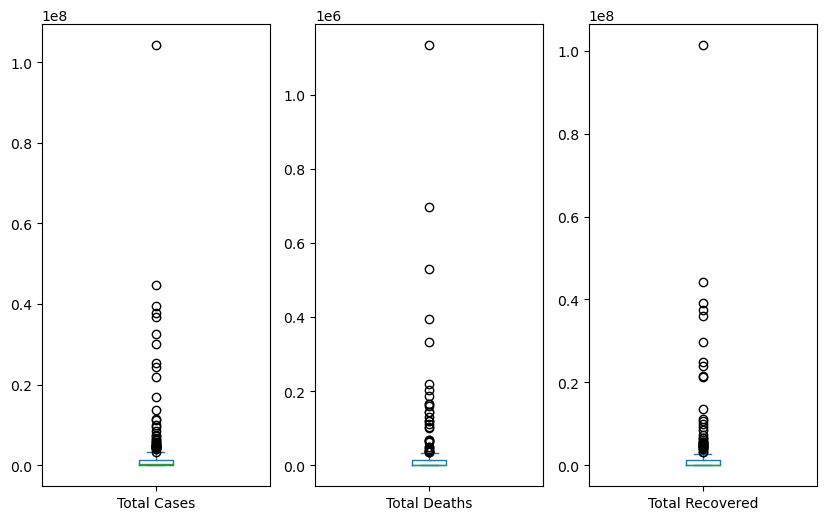

In [94]:
#Create a boxplot from your data.

df_country_filtered = df_country_sorted[['Country','Total Cases','Total Deaths','Total Recovered']]

df_country_filtered.plot(kind='box', figsize = (10,6), subplots = True)

In [95]:
## Create a bivariate plot from your data:

[Text(0.5, 1.0, 'Scatter plot - Total Cases vs Recovered Cases')]

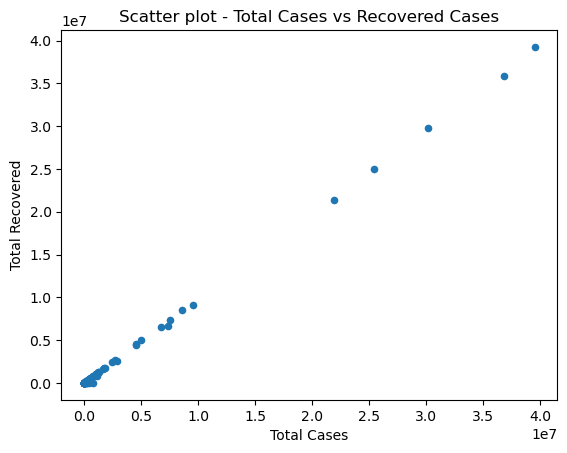

In [96]:
# Create a bivariate plot from your data.

df_country_sorted.sample(100).plot.scatter(x='Total Cases', y='Total Recovered').set(title="Scatter plot - Total Cases vs Recovered Cases")

## Create a histogram or bar graph from your data

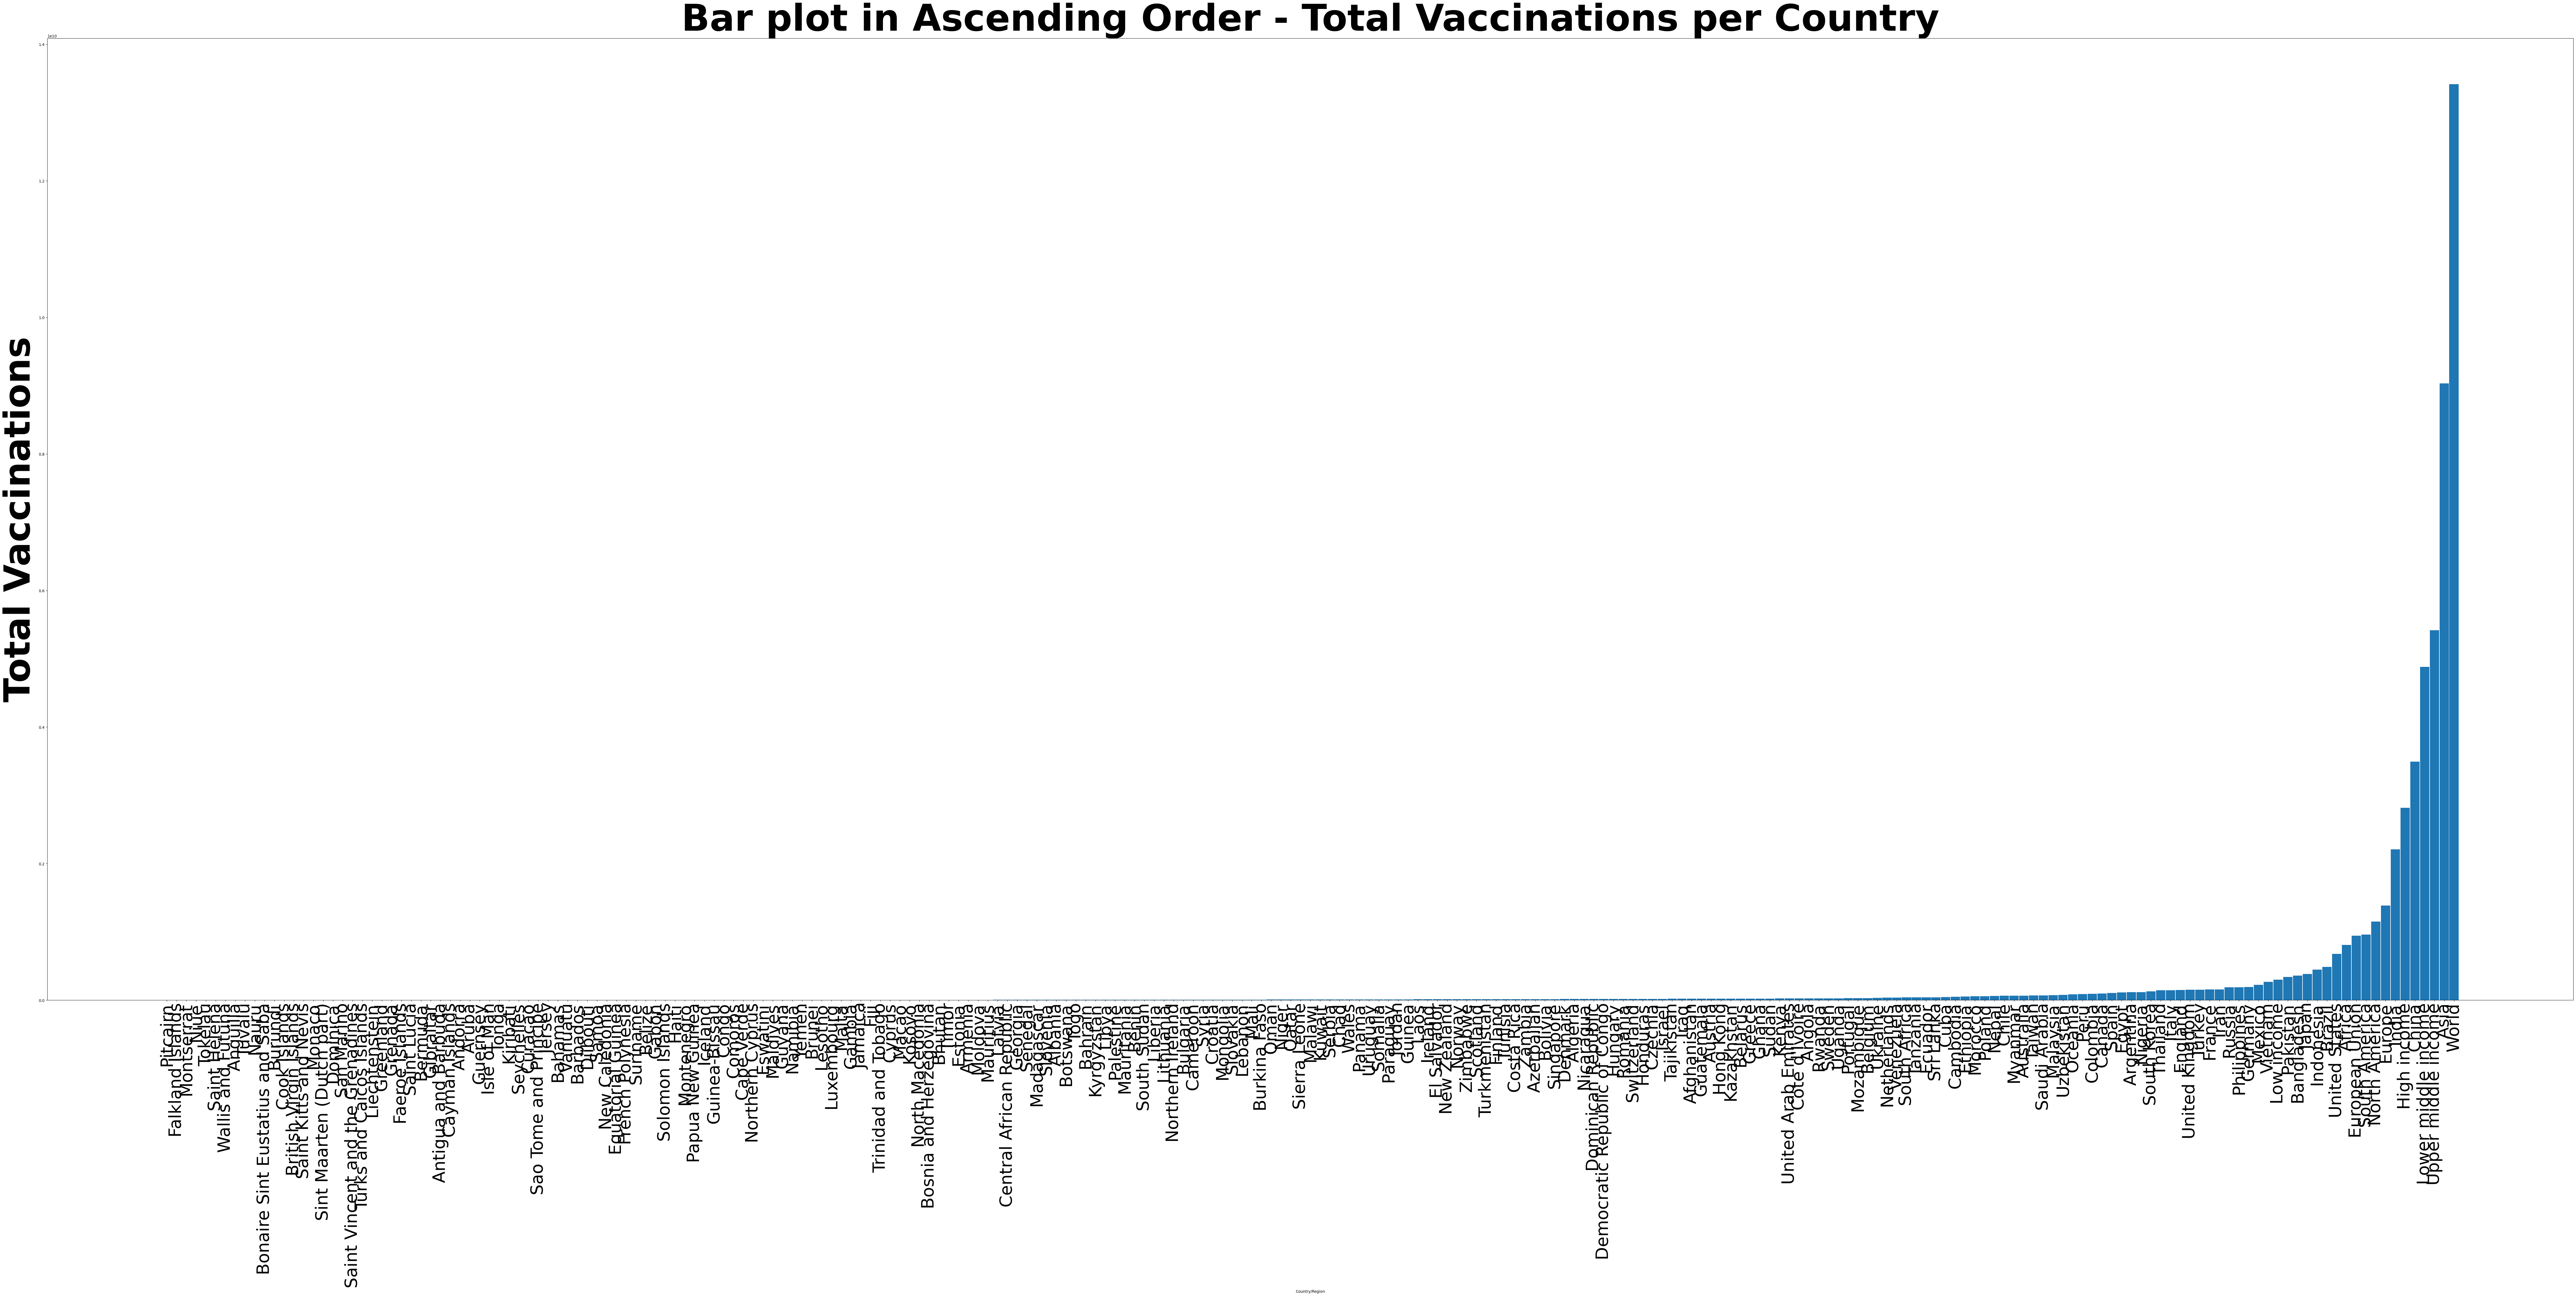

In [97]:
plt.figure(figsize=(120,46))
# bar plot with matplotlib
width = 0.95 # the width of the bars
plt.bar('location', 'total_vaccinations',width=width,data=df_vaccine_sorted)
plt.xlabel("Country/Region")
plt.xticks(rotation=90, horizontalalignment="center", size=45)
plt.ylabel("Total Vaccinations", size=95, weight='bold')
plt.title("Bar plot in Ascending Order - Total Vaccinations per Country", size=98, weight='bold')
plt.show()

## Summarize your results and make a conclusion. Explain how you arrived at this conclusion and how your visualizations support your conclusion.
Looking at the different plots, we can conclude that United States is the worst hit country due to the COVID-19 pandemic.

I can confirm that using the below plot and their results:

1. Bar plot in Ascending Order - Total Cases per Country: This plot confirms United States had the most number of confirmed COVID cases.
2. Bar plot in Ascending Order - COVID Deaths per Country: This plot confirms United States had the most number of COVID deaths.
3. Bar plot in Ascending Order - Recovered Cases per Country: This plot confirms United States had the most number of COVID deaths.
4. Bar plot in Ascending Order - Total Vaccinations per Country: This plot confirms China had the most number of COVID vaccinations compared to United States but United States has the most number total cases and deaths.
5. Boxplot from your data: Box plot shows that the recoveries are much more than the deaths glocally, so we can confirm, overall recoveries globally are good.
6. Bivariate plot from your data: Scatter plot is one of the bivariate plots. Scatter plot shows that Confirmed cases vs Recoveries is linear which means globally situation was not best or worst.

Conclusion:

    Though the situation around was neither good nor bad. However, looking at all the plots, we can confirm United States is the worst effected country which has more confirmed cases and deaths but not recoveries and vaccinations.

    With the data visualizations provided above, we can confirm China did better with amount of vaccinations to their public to bring the situation under control